In [ ]:
import os
import random
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from decimal import Decimal
from itertools import combinations,permutations,product
from scipy.spatial import distance_matrix

In [ ]:
class TSP:
  def __init__(self):
    pass

  def get_distance(self,distance_matrix,start_node,end_node):
      """Get the distance between two speicified locations"""
      return distance_matrix[start_node][end_node]
      
  def get_total_dist(self,distance_matrix,seq):
      """Get the total distance of a route"""
      total_dist = sum([self.get_distance(distance_matrix,seq[i],seq[i+1]) for i in range(len(seq)-1)])
      total_dist += self.get_distance(distance_matrix,0,seq[0])+self.get_distance(distance_matrix,0,seq[-1])
      return total_dist

  # Brute force method
  def brute_force(self,distance_matrix):
      """Get the optimal route by calculating the total travel distance for all possibilities"""
      
      dim = distance_matrix.shape[0]
      # Dictionary of candidate routes and their corresponding total distances
      total_dists = {}
      # Note that the start should be the first and the last location
      for i in permutations(range(1,dim),dim-1):
          # Initialize total distance of candidate route
          total_dist = 0
          # Get the sequence of locations to visit
          seq = list(i)
          for j in range(len(seq)-1):
              dist = self.get_distance(distance_matrix,seq[j],seq[j+1])
              total_dist += dist
          # Add distance between the start and the first location
          total_dist += self.get_distance(distance_matrix,0,seq[0])
          # Add distance between the start and the last location
          total_dist += self.get_distance(distance_matrix,0,seq[-1])
          total_dists[f'{seq}'] = total_dist
          
      # Get the optimal customer sequence
      best_route = min(total_dists,key=total_dists.get)
      min_dist =total_dists[best_route]
      # Add start to the start and the end of the sequence
      best_route = [0]+[int(i) for i in best_route if i not in ['[',']',' ',',']]+[0] 
      
      return best_route,min_dist

### Low Dimensional Cases

In [ ]:
# Generate some sample data points
x_cor_inner = [5,7,9,7]
y_cor_inner = [5,3,5,7]

x_cor_outer = [1,7,15,6]
y_cor_outer = [4,1,8,9]

x_cor = x_cor_inner+x_cor_outer
y_cor = y_cor_inner+y_cor_outer

labels = ['A','B','C','D','E','F','G','H']

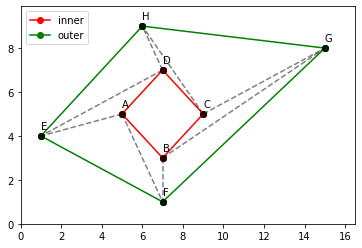

In [ ]:
# Visualize the locations of the sample data
for i in range(4):
  if i==0:
    plt.plot([x_cor_inner[i],x_cor_inner[-1]],[y_cor_inner[i],y_cor_inner[-1]],'ro-',label='inner')
    plt.plot([x_cor_outer[i],x_cor_outer[-1]],[y_cor_outer[i],y_cor_outer[-1]],'go-',label='outer')
  plt.plot(x_cor_inner[i:i+2],y_cor_inner[i:i+2],'ro-')
  plt.plot(x_cor_outer[i:i+2],y_cor_outer[i:i+2],'go-')

pair1 = [labels.index('A'),labels.index('E')]
pair2 = [labels.index('B'),labels.index('F')]
pair3 = [labels.index('C'),labels.index('G')]
pair4 = [labels.index('D'),labels.index('H')]
pair5 = [labels.index('A'),labels.index('F')]
pair6 = [labels.index('B'),labels.index('G')]
pair7 = [labels.index('C'),labels.index('H')]
pair8 = [labels.index('D'),labels.index('E')]

for p in [pair1,pair2,pair3,pair4,pair5,pair6,pair7,pair8]:
  plt.plot([x_cor[p[0]],x_cor[p[1]]],[y_cor[p[0]],y_cor[p[1]]],'ko--',alpha=0.5)

for i,label in enumerate(labels):
  plt.annotate(label,(x_cor[i],y_cor[i]),xytext=(x_cor[i],y_cor[i]+0.3))

plt.xlim(0,max(x_cor)*1.1)
plt.ylim(0,max(y_cor)*1.1)

plt.legend()
plt.show()

The red lines form an inner loop while the green lines form an outer loop (Consider the Harare example in the paper). The loops can be connected by adding lines between any pairs of nodes from the two loops.

In [ ]:
# Get the distance matrix
points = [[x_cor[i],y_cor[i]] for i in range(8)]
dm_full = distance_matrix(points,points)
df_dm = pd.DataFrame(dm_full,columns=labels,index=labels)

**Unconstrained Problem**

In [ ]:
df_dm_full = df_dm.copy()
df_dm_full

,A,B,C,D,E,F,G,H
A,0.000000,2.828427,4.000000,2.828427,4.123106,4.472136,10.440307,4.000000
B,2.828427,0.000000,2.828427,4.000000,6.082763,2.000000,9.433981,6.324555
C,4.000000,2.828427,0.000000,2.828427,8.062258,4.472136,6.708204,5.656854
D,2.828427,4.000000,2.828427,0.000000,6.708204,6.000000,8.062258,2.828427
E,4.123106,6.082763,8.062258,6.708204,0.000000,6.708204,14.560220,6.403124
F,4.472136,2.000000,4.472136,6.000000,6.708204,0.000000,10.630146,8.246211
G,10.440307,9.433981,6.708204,8.062258,14.560220,10.630146,0.000000,10.049876
H,4.000000,6.324555,5.656854,2.828427,6.403124,8.246211,10.049876,0.000000


We start by running a benchmark case with full connectivity, i.e., there exists a direction connection between each pair of nodes. We solve a traveling salesman problem and obtain the minimum total travel distance to visit all nodes.

In [ ]:
mapping = {}
for i,label in enumerate(labels):
  mapping[i] = label

tsp_solve = TSP()
# Brute force solution
best_route,min_dist = tsp_solve.brute_force(dm_full)
best_route = [mapping[i] for i in best_route]

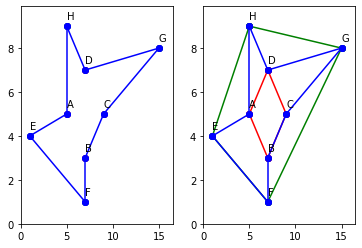

In [ ]:
# Visualize the best route
f,a = plt.subplots(1,2)

route_idx = [labels.index(i) for i in best_route]

# Plot 1
for i in range(4):
  a[0].plot(x_cor_inner[i],y_cor_inner[i],'ro-')
  a[0].plot(x_cor_outer[i],y_cor_outer[i],'go-')

for i in range(len(route_idx)-1):
  a[0].plot([x_cor[route_idx[i]],x_cor[route_idx[i+1]]],[y_cor[route_idx[i]],y_cor[route_idx[i+1]]],'bo-')

for i,label in enumerate(labels):
  a[0].annotate(label,(x_cor[i],y_cor[i]),xytext=(x_cor[i],y_cor[i]+0.3))

a[0].set_xlim(0,max(x_cor)*1.1)
a[0].set_ylim(0,max(y_cor)*1.1)

# Plot 2
for i in range(4):
  if i==0:
    a[1].plot([x_cor_inner[i],x_cor_inner[-1]],[y_cor_inner[i],y_cor_inner[-1]],'ro-')
    a[1].plot([x_cor_outer[i],x_cor_outer[-1]],[y_cor_outer[i],y_cor_outer[-1]],'go-')
  a[1].plot(x_cor_inner[i:i+2],y_cor_inner[i:i+2],'ro-')
  a[1].plot(x_cor_outer[i:i+2],y_cor_outer[i:i+2],'go-')

for i in range(len(route_idx)-1):
  a[1].plot([x_cor[route_idx[i]],x_cor[route_idx[i+1]]],[y_cor[route_idx[i]],y_cor[route_idx[i+1]]],'bo-')

for i,label in enumerate(labels):
  a[1].annotate(label,(x_cor[i],y_cor[i]),xytext=(x_cor[i],y_cor[i]+0.3))

a[1].set_xlim(0,max(x_cor)*1.1)
a[1].set_ylim(0,max(y_cor)*1.1)

plt.show()

Benchmark global optimal connection vs. existing layout. Ideally, all the blue lines that don't overlap with existing connection should be added.

**Constrained Problem**

*Add One Additional Connection*

Suppose we face constraints like "one additional connection only" or "impossible connection between specific pairs of nodes", we can adjust the value in the distance matrix to accomodate these constraints. For example, changing the distance between node A and B to some extremely large value means that the algorithm will never yield a solution with these two nodes directly connected. 

In reality, we can modify the physical distances between nodes with street quality information. A highway reduces the travel distance (vs. the concept of physical distance) while a dirt road increases it.

Back to our previous example, suppose we want to add one extra connection (or upgrade an existing one) on top of the current inner and outer loops so that the two loops are better connected. Among all the pairs of nodes that aren't currently connected, we can choose one pair, preserve its true physicial distance, and set the other pairs' distances in the matrix to an arbitrary large value. We run the algorithm for each possible pair, and choose the pair that yields the minimum total travel distance.

Suppose we want to figure out the minimum travel distance if we connect A and E, we need to change the distance value of all entries in the matrix except for the pairs that are already connected. That is, we keep the actualy distance between 

A-B, B-C, C-D, D-A, E-F, F-G, G-H, H-E, A-E 

pairs intact in the distance matrix, and adjust the values of other (excluding the diagonal entries) to 1000. 

In [ ]:
# Generate all possible inner-outer node pairs that are not currently connected as candidates
inner_nodes = ['A','B','C','D']
outer_nodes = ['E','F','G','H']

candidates = list(product(inner_nodes,outer_nodes))

# All pairs 
all_pairs = list(product(labels,labels))

# Connected pairs
conn_pairs = [('A','B'),('B','C'),('C','D'),('D','A'),('E','F'),('F','G'),('G','H'),('H','E')]
conn_pairs_set = [set(p) for p in conn_pairs]

In [ ]:
# Suppose the we add or upgrade the connection between node A and E, the distance matrix should be
df_dm_cons = df_dm.copy()

for pair in all_pairs:
  if set(pair) not in conn_pairs_set and set(pair)!=set(('A','E')):
    df_dm_cons.loc[pair[0],pair[1]] = 1000

np.fill_diagonal(df_dm_cons.values,0.0)
df_dm_cons

,A,B,C,D,E,F,G,H
A,0.000000,2.828427,1000.000000,2.828427,4.123106,1000.000000,1000.000000,1000.000000
B,2.828427,0.000000,2.828427,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
C,1000.000000,2.828427,0.000000,2.828427,1000.000000,1000.000000,1000.000000,1000.000000
D,2.828427,1000.000000,2.828427,0.000000,1000.000000,1000.000000,1000.000000,1000.000000
E,4.123106,1000.000000,1000.000000,1000.000000,0.000000,6.708204,1000.000000,6.403124
F,1000.000000,1000.000000,1000.000000,1000.000000,6.708204,0.000000,10.630146,1000.000000
G,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,10.630146,0.000000,10.049876
H,1000.000000,1000.000000,1000.000000,1000.000000,6.403124,1000.000000,10.049876,0.000000


In [ ]:
summary = []

# Formally test all candidates
for candidate in candidates:
  df_dm_cons = df_dm.copy()
  for pair in all_pairs:
    if set(pair) not in conn_pairs_set and set(pair)!=set(candidate):
      df_dm_cons.loc[pair[0],pair[1]] = 1000

  np.fill_diagonal(df_dm_cons.values,0.0)

  best_route,min_dist = tsp_solve.brute_force(np.array(df_dm_cons))
  best_route = [mapping[i] for i in best_route]
  summary.append([candidate,best_route,min_dist])

df_summary = pd.DataFrame(summary,columns=['new_connection','best_route','shortest_distance'])

In [ ]:
# Summary of best route and shortest travel distance
df_summary

,new_connection,best_route,shortest_distance
0,"(A, E)","[A, B, C, D, F, G, H, E, A]",1039.691533
1,"(A, F)","[A, B, C, D, G, H, E, F, A]",1036.118621
2,"(A, G)","[A, B, C, D, F, E, H, G, A]",1042.086792
3,"(A, H)","[A, B, C, D, G, F, E, H, A]",1036.226755
4,"(B, E)","[A, D, C, B, E, H, G, F, A]",1041.651190
5,"(B, F)","[A, B, F, E, H, G, C, D, A]",1033.646485
6,"(B, G)","[A, B, G, H, E, F, C, D, A]",1041.080466
7,"(B, H)","[A, D, C, B, H, E, F, G, A]",1038.551311
8,"(C, E)","[A, B, C, E, H, G, F, D, A]",1043.630685
9,"(C, F)","[A, B, C, F, E, H, G, D, A]",1036.118621


In [ ]:
# Select and plot the best connection to add
best_candidate = df_summary.iloc[np.argmin(df_summary['shortest_distance']),:]
new_connection = best_candidate['new_connection']
best_route = best_candidate['best_route']
min_dist = best_candidate['shortest_distance']

print('Nodes {} should be connected.'.format(new_connection))
print('The optimal route is {}.'.format(best_route))
print('The shortest travel distance after the addition is {}.'.format(min_dist))

Nodes ('B', 'F') should be connected.
The optimal route is ['A', 'B', 'F', 'E', 'H', 'G', 'C', 'D', 'A'].
The shortest travel distance after the addition is 1033.6464851652918.


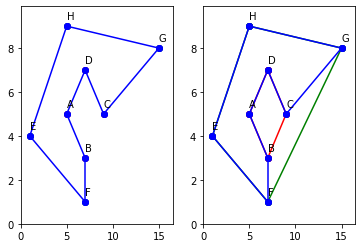

In [ ]:
# Visualize the best route
f,a = plt.subplots(1,2)

route_idx = [labels.index(i) for i in best_route]

# Plot 1
for i in range(4):
  a[0].plot(x_cor_inner[i],y_cor_inner[i],'ro-')
  a[0].plot(x_cor_outer[i],y_cor_outer[i],'go-')

for i in range(len(route_idx)-1):
  a[0].plot([x_cor[route_idx[i]],x_cor[route_idx[i+1]]],[y_cor[route_idx[i]],y_cor[route_idx[i+1]]],'bo-')

for i,label in enumerate(labels):
  a[0].annotate(label,(x_cor[i],y_cor[i]),xytext=(x_cor[i],y_cor[i]+0.3))

a[0].set_xlim(0,max(x_cor)*1.1)
a[0].set_ylim(0,max(y_cor)*1.1)

# Plot 2
for i in range(4):
  if i==0:
    a[1].plot([x_cor_inner[i],x_cor_inner[-1]],[y_cor_inner[i],y_cor_inner[-1]],'ro-')
    a[1].plot([x_cor_outer[i],x_cor_outer[-1]],[y_cor_outer[i],y_cor_outer[-1]],'go-')
  a[1].plot(x_cor_inner[i:i+2],y_cor_inner[i:i+2],'ro-')
  a[1].plot(x_cor_outer[i:i+2],y_cor_outer[i:i+2],'go-')

for i in range(len(route_idx)-1):
  a[1].plot([x_cor[route_idx[i]],x_cor[route_idx[i+1]]],[y_cor[route_idx[i]],y_cor[route_idx[i+1]]],'bo-')

for i,label in enumerate(labels):
  a[1].annotate(label,(x_cor[i],y_cor[i]),xytext=(x_cor[i],y_cor[i]+0.3))

a[1].set_xlim(0,max(x_cor)*1.1)
a[1].set_ylim(0,max(y_cor)*1.1)

plt.show()

Notice that the shortest travel distance of all candidates is above 1000. The is beacuse of the "no repeated visit" requirement in our algorithm. In the above graph, the non-existing or hard-to-travel connection with travel distance 1000 between node C and G is forced into the solution due the requirement. While one solution is two modify our algorithm to allow for repeated visits, we opt to try allowing for two additinoal connections instead of one in the next part.

*Add Two Additional Connections*

For the most part, it is very similar to the one additional connection problem. The key difference is that each of the candidate now consists of two pairs of node. 

In [ ]:
# All combinations of candidate pairs 
candidates_ext = list(combinations(candidates,2))

In [ ]:
summary_ext = []

# Formally test all candidates
for candidate_pair in candidates_ext:
  df_dm_cons_ext = df_dm.copy()
  for pair in all_pairs:
    if set(pair) not in conn_pairs_set and set(pair)!=set(candidate_pair[0]) and set(pair)!=set(candidate_pair[1]):
      df_dm_cons_ext.loc[pair[0],pair[1]] = 1000

  np.fill_diagonal(df_dm_cons_ext.values,0.0)

  best_route,min_dist = tsp_solve.brute_force(np.array(df_dm_cons_ext))
  best_route = [mapping[i] for i in best_route]
  summary_ext.append([candidate_pair,best_route,min_dist])

df_summary_ext = pd.DataFrame(summary_ext,columns=['new_connection','best_route','shortest_distance'])

In [ ]:
# Summary of best route and shortest travel distance
df_summary_ext

,new_connection,best_route,shortest_distance
0,"((A, E), (A, F))","[A, B, C, D, E, H, G, F, A]",1681.040563
1,"((A, E), (A, G))","[A, E, F, G, H, D, C, B, A]",3101.996612
2,"((A, E), (A, H))","[A, E, H, G, F, D, C, B, A]",1110.691533
3,"((A, E), (B, E))","[A, D, C, B, F, G, H, E, A]",2924.691533
4,"((A, E), (B, F))","[A, D, C, B, F, G, H, E, A]",41.691533
...,...,...,...
115,"((D, E), (D, G))","[A, B, C, D, G, F, E, H, A]",2214.289013
116,"((D, E), (D, H))","[A, B, C, E, F, G, H, D, A]",1831.701934
117,"((D, F), (D, G))","[A, D, F, G, H, E, C, B, A]",2148.568427
118,"((D, F), (D, H))","[A, B, C, D, H, G, F, E, A]",2601.701934


In [ ]:
# Select and plot the best connection to add
best_candidate = df_summary_ext.iloc[np.argmin(df_summary_ext['shortest_distance']),:]
new_connection = best_candidate['new_connection']
best_route = best_candidate['best_route']
min_dist = best_candidate['shortest_distance']

print('Nodes {} should be connected.'.format(new_connection))
print('The optimal route is {}.'.format(best_route))
print('The shortest travel distance after the addition is {}.'.format(min_dist))

Nodes (('B', 'F'), ('C', 'G')) should be connected.
The optimal route is ['A', 'B', 'F', 'E', 'H', 'G', 'C', 'D', 'A'].
The shortest travel distance after the addition is 40.35468909779105.


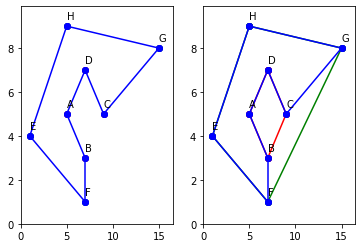

In [ ]:
# Visualize the best route
f,a = plt.subplots(1,2)

route_idx = [labels.index(i) for i in best_route]

# Plot 1
for i in range(4):
  a[0].plot(x_cor_inner[i],y_cor_inner[i],'ro-')
  a[0].plot(x_cor_outer[i],y_cor_outer[i],'go-')

for i in range(len(route_idx)-1):
  a[0].plot([x_cor[route_idx[i]],x_cor[route_idx[i+1]]],[y_cor[route_idx[i]],y_cor[route_idx[i+1]]],'bo-')

for i,label in enumerate(labels):
  a[0].annotate(label,(x_cor[i],y_cor[i]),xytext=(x_cor[i],y_cor[i]+0.3))

a[0].set_xlim(0,max(x_cor)*1.1)
a[0].set_ylim(0,max(y_cor)*1.1)

# Plot 2
for i in range(4):
  if i==0:
    a[1].plot([x_cor_inner[i],x_cor_inner[-1]],[y_cor_inner[i],y_cor_inner[-1]],'ro-')
    a[1].plot([x_cor_outer[i],x_cor_outer[-1]],[y_cor_outer[i],y_cor_outer[-1]],'go-')
  a[1].plot(x_cor_inner[i:i+2],y_cor_inner[i:i+2],'ro-')
  a[1].plot(x_cor_outer[i:i+2],y_cor_outer[i:i+2],'go-')

for i in range(len(route_idx)-1):
  a[1].plot([x_cor[route_idx[i]],x_cor[route_idx[i+1]]],[y_cor[route_idx[i]],y_cor[route_idx[i+1]]],'bo-')

for i,label in enumerate(labels):
  a[1].annotate(label,(x_cor[i],y_cor[i]),xytext=(x_cor[i],y_cor[i]+0.3))

a[1].set_xlim(0,max(x_cor)*1.1)
a[1].set_ylim(0,max(y_cor)*1.1)

plt.show()

In our specific example, we obtain the same travel path as the one additional connection problem at a much shorter total travel distance. The algorithm endogenously suggests connecting nodes C and G on in addition to B and F. 

The solution method can be generalized to different set of node coordinates and initial connection specification. Users simply need to adjust the distance matrix according. 

### High Dimensional Cases

**Hueristic Solutions**

*Savings Algorithm*

*Sweeping Algorithm (with Pre-Defined Radius)*